# Market Share Forecasting
By using LSTM RNN's we estimate a multi-variate time series where all observations sum to one. This is done by employing an Long Short-Term Memory (LSTM) Recurrent Neural Network (RNN) with Softmax (rescales output s.t. they sum to one) output layer.

See:

* [ANOMALY DETECTION IN AIRCRAFT DATA USING RECURRENT NEURAL NETWORKS, Nanduri and Sherry, ICNS 2016](http://catsr.ite.gmu.edu/pubs/ICNS_2016_AnomalyDetectionRNN_01042015.pdf)
* [RNNs in Keras](https://github.com/trnkatomas/Keras_2_examples/blob/master/Simple_LSTM_keras_2.0.ipynb)

In [9]:
import pandas as pd
import numpy as np
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM
from sklearn.metrics import mean_squared_error as mse

In [2]:
!ls ../output/aufgabe_3*

../output/aufgabe_3_softmaxed_materials.csv
../output/aufgabe_3_softmaxed_missile_launchers.csv
../output/aufgabe_3_softmaxed_ships.csv


In [3]:
df_materials = pd.read_csv('../output/aufgabe_3_softmaxed_materials.csv')
df_missile_launchers= pd.read_csv('../output/aufgabe_3_softmaxed_missile_launchers.csv')
df_ships = pd.read_csv('../output/aufgabe_3_softmaxed_ships.csv')

In [18]:
# reproducability
np.random.seed(42)

In [179]:
df_materials.columns.values

array(['month', 'total', 'raw', 'gas_clouds', 'ice', 'reaction',
       'planetary', 'mineral', 'salvage', 'fraction'], dtype=object)

In [154]:
def _load_data(data, n_prev = 2):
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []

    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())

    return np.array(docX), np.array(docY)

def train_test_split(df, test_size=1/3):
    """
    This just splits data to training and testing parts
    """
    ntrn = int(round(len(df) * (1 - test_size)))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)

    return (X_train, y_train), (X_test, y_test)


In [155]:
(X_train, y_train), (X_test, y_test) = train_test_split(df_materials.drop(['month'], axis=1))

(30, 2, 9)
(14, 2, 9)
(30, 9)
(14, 9)


In [156]:
N_hidden = 300

model = Sequential()
# 300 hidden neurons
print(X_train.shape)

model.add(LSTM(N_hidden,
               return_sequences=False,
               input_shape=(2, 9)))
model.add(Dense(9, input_dim=N_hidden))  
model.add(Activation('softmax'))
#model.add(Dropout(.2))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

(30, 2, 9)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_32 (LSTM)                   (None, 300)           372000      lstm_input_32[0][0]              
____________________________________________________________________________________________________
dense_19 (Dense)                 (None, 9)             2709        lstm_32[0][0]                    
____________________________________________________________________________________________________
activation_14 (Activation)       (None, 9)             0           dense_19[0][0]                   
Total params: 374,709
Trainable params: 374,709
Non-trainable params: 0
____________________________________________________________________________________________________


In [157]:
model.fit(X_train, y_train, batch_size=10, nb_epoch=100, validation_split=0.05)

Train on 28 samples, validate on 2 samples
Epoch 1/100
28/28 [==============================] - 2s - loss: 0.0019 - val_loss: 0.0017
Epoch 2/100
28/28 [==============================] - 0s - loss: 0.0016 - val_loss: 0.0014
Epoch 3/100
28/28 [==============================] - 0s - loss: 0.0013 - val_loss: 0.0011
Epoch 4/100
28/28 [==============================] - 0s - loss: 0.0010 - val_loss: 8.0664e-04
Epoch 5/100
28/28 [==============================] - 0s - loss: 7.2132e-04 - val_loss: 4.8892e-04
Epoch 6/100
28/28 [==============================] - 0s - loss: 4.0575e-04 - val_loss: 1.9738e-04
Epoch 7/100
28/28 [==============================] - 0s - loss: 1.4251e-04 - val_loss: 2.7507e-05
Epoch 8/100
28/28 [==============================] - 0s - loss: 3.5574e-05 - val_loss: 7.1161e-05
Epoch 9/100
28/28 [==============================] - 0s - loss: 1.1156e-04 - val_loss: 1.5611e-04
Epoch 10/100
28/28 [==============================] - 0s - loss: 1.4408e-04 - val_loss: 1.0135e-04
Epoc

28/28 [==============================] - 0s - loss: 1.8740e-05 - val_loss: 1.5837e-05
Epoch 84/100
28/28 [==============================] - 0s - loss: 1.8803e-05 - val_loss: 1.5119e-05
Epoch 85/100
28/28 [==============================] - 0s - loss: 1.8820e-05 - val_loss: 1.5641e-05
Epoch 86/100
28/28 [==============================] - 0s - loss: 1.8881e-05 - val_loss: 1.6134e-05
Epoch 87/100
28/28 [==============================] - 0s - loss: 1.8776e-05 - val_loss: 1.7080e-05
Epoch 88/100
28/28 [==============================] - 0s - loss: 1.8785e-05 - val_loss: 1.9022e-05
Epoch 89/100
28/28 [==============================] - 0s - loss: 1.8811e-05 - val_loss: 1.8612e-05
Epoch 90/100
28/28 [==============================] - 0s - loss: 1.8876e-05 - val_loss: 1.8608e-05
Epoch 91/100
28/28 [==============================] - 0s - loss: 1.8797e-05 - val_loss: 1.7325e-05
Epoch 92/100
28/28 [==============================] - 0s - loss: 1.8844e-05 - val_loss: 1.6750e-05
Epoch 93/100
28/28 [===

In [158]:
predicted = model.predict(X_test)  
rmse = np.sqrt(((predicted - y_test) ** 2).mean(axis=0))

In [159]:
print(rmse)

[ 0.00025816  0.00684641  0.00125286  0.00314994  0.00715315  0.00191323
  0.01390106  0.00131116  0.00029972]


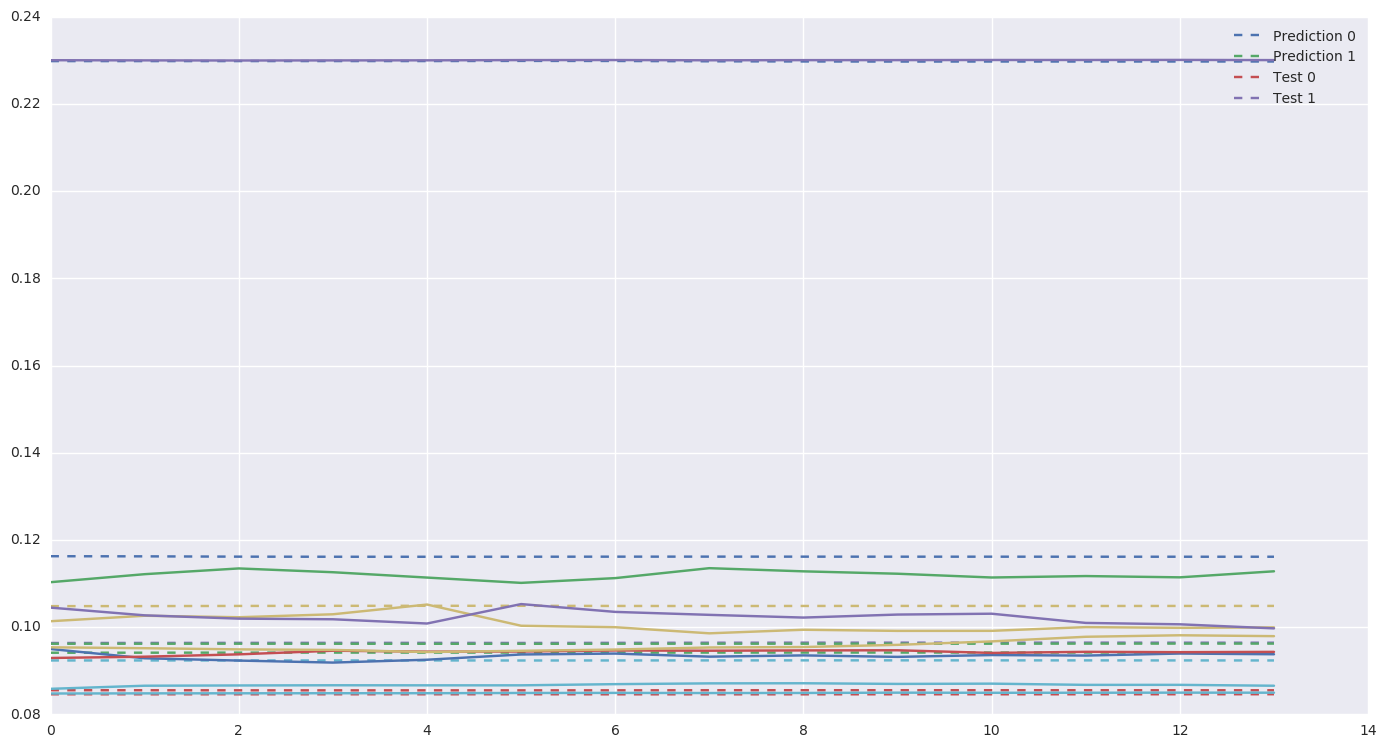

In [178]:
%matplotlib inline

import seaborn as sns

sns.set_style("darkgrid")

colors = sns.color_palette("husl", 10)
plt.rcParams["figure.figsize"] = (17, 9)
plt.plot(predicted,"--") #, cmap=plt.cm.get_cmap('Dark2'))
plt.plot(y_test)#, cmap=plt.cm.get_cmap('Dark2'))
plt.legend(["Prediction 0", "Prediction 1", "Test 0", "Test 1"])

In [161]:
predicted

array([[ 0.22983496,  0.09411614,  0.08551874,  0.09634911,  0.1048069 ,
         0.09234527,  0.11625766,  0.09618074,  0.08459053],
       [ 0.22983596,  0.09412722,  0.08551364,  0.09636726,  0.10481606,
         0.09234567,  0.11622793,  0.09618331,  0.08458282],
       [ 0.22984074,  0.09414619,  0.08549625,  0.09638298,  0.10485218,
         0.092349  ,  0.11615858,  0.09618977,  0.08458425],
       [ 0.22984347,  0.09414762,  0.08549055,  0.09638626,  0.10487781,
         0.09235184,  0.11613612,  0.09617908,  0.08458729],
       [ 0.22984399,  0.09415025,  0.08549179,  0.09638347,  0.10488516,
         0.09235136,  0.11613341,  0.09617218,  0.08458839],
       [ 0.22987804,  0.09414942,  0.08548966,  0.0963605 ,  0.10488505,
         0.09233799,  0.11614083,  0.09616752,  0.08459111],
       [ 0.22986233,  0.09414399,  0.08549523,  0.09638626,  0.10484947,
         0.09234837,  0.11615624,  0.09617754,  0.08458053],
       [ 0.22979096,  0.09415495,  0.08551461,  0.09641507,  0

In [151]:
pd.DataFrame(np.exp(predicted), columns=df_materials.drop(['month'], axis=1).columns)

,total,raw,gas_clouds,ice,reaction,planetary,mineral,salvage,fraction
0,1.257999,1.101000,1.089673,1.101318,1.112335,1.097223,1.118681,1.100495,1.088411
1,1.257988,1.101004,1.089683,1.101313,1.112330,1.097228,1.118669,1.100495,1.088424
2,1.257915,1.101024,1.089704,1.101318,1.112342,1.097244,1.118640,1.100496,1.088442


In [136]:
y_test

array([[ 0.23008683,  0.09999429,  0.08674474,  0.09346685,  0.11170667,
         0.0943262 ,  0.1009583 ,  0.09777869,  0.08493742],
       [ 0.23010285,  0.09982803,  0.08674972,  0.0939314 ,  0.11141332,
         0.09424813,  0.10063951,  0.09812462,  0.08496243],
       [ 0.23005994,  0.09993471,  0.08654695,  0.09376808,  0.11279936,
         0.09431696,  0.09970304,  0.09792155,  0.08494941]])

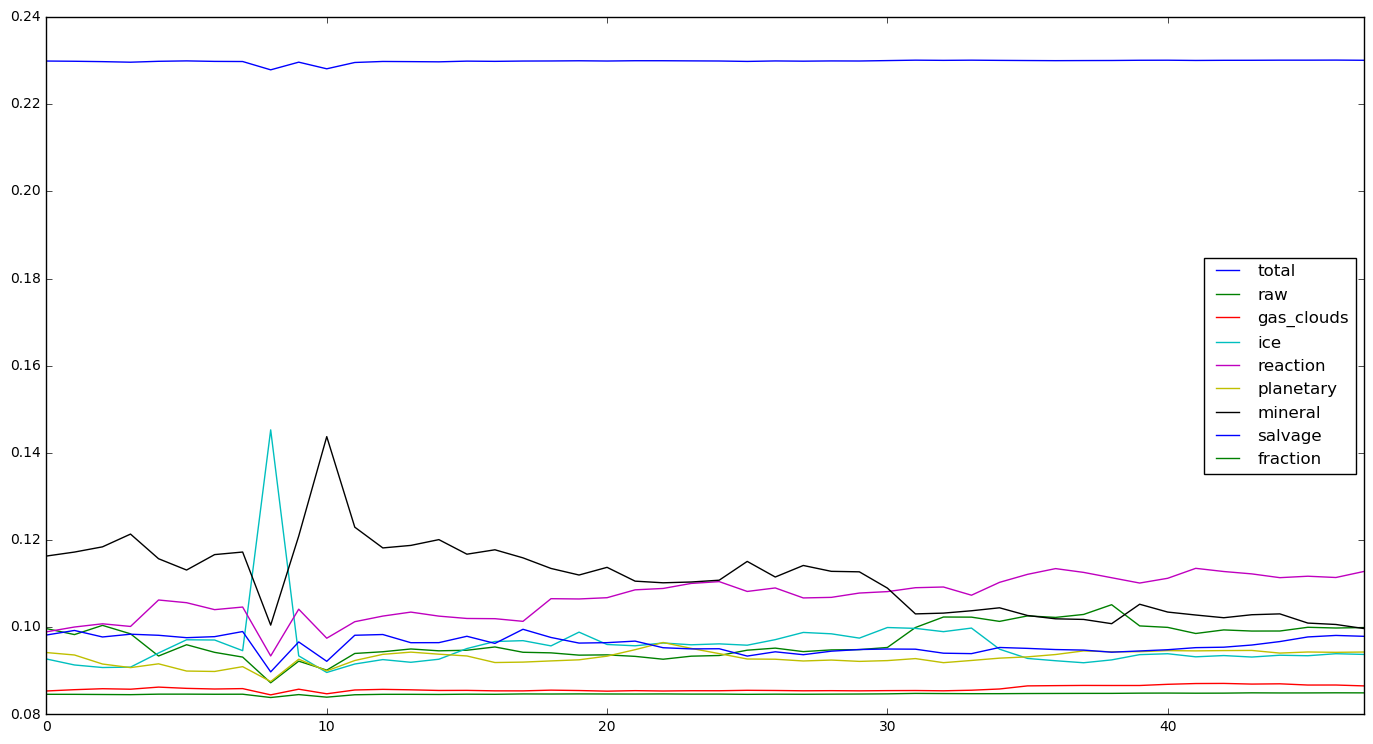

In [152]:
df_materials.plot()